In [17]:
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import re

Entrez.email = 'sasha.grrshnova98@gmail.com'

In [15]:
#get sequence by id from ncbi genbank

def id_search(seq_id):
    handle=Entrez.efetch(db="nucleotide", id = seq_id, rettype='fasta')
    for seq_record in SeqIO.parse(handle,'fasta'):
        return seq_record.seq

In [19]:
#get B.burgdorferi genome

seq_id = 'NC_001318.1'

Bburgdorferi_genome = id_search(seq_id)

In [30]:
#retrieve PAM positions in genome/gene from seq - Watson strand

def PAM_search(seq):
    
    genome = str(seq)
    
    PAM_positions = {}
    PAM_count = {}

    PAM_pos = []
    for m in re.finditer(r"[ACGT]GG", genome):
        PAM_pos.append(m.start())
        PAM_positions['SpCas9'] = PAM_pos
        PAM_count['SpCas9'] = len(PAM_pos)
    
    PAM_pos = []
    for m in re.finditer(r"[ACGT]G[AG][AG]T", genome):
        PAM_pos.append(m.start())
        PAM_positions['SaCas9_1'] = PAM_pos
        PAM_count['SaCas9_1'] = len(PAM_pos)

    PAM_pos = []
    for m in re.finditer(r"[ACGT]G[AG][AG][ACGT]", genome):
        PAM_pos.append(m.start())
        PAM_positions['SaCas9_2'] = PAM_pos
        PAM_count['SaCas9_2'] = len(PAM_pos)
    
    PAM_pos = []
    for m in re.finditer(r"[ACGT][ACGT][ACGT][ACGT][AG][CT]AC", genome):
        PAM_pos.append(m.start())
        PAM_positions['CjCas9'] = PAM_pos
        PAM_count['CjCas9'] = len(PAM_pos)

    return PAM_positions

In [31]:
Bburgdorferi_PAM = PAM_search(Bburgdorferi_genome)

In [32]:
#number of PAM for different Cas9 proteins in B.burgdorferi genome

Bburgdorferi_PAM_cnt = {}
for k in Bburgdorferi_PAM.keys():
    Bburgdorferi_PAM_cnt[k] = len(Bburgdorferi_PAM.get(k))
    
print(Bburgdorferi_PAM_cnt)

{'SpCas9': 19252, 'SaCas9_1': 11338, 'SaCas9_2': 28741, 'CjCas9': 5752}


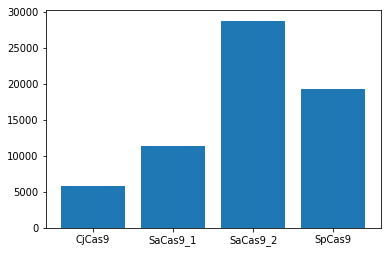

In [33]:
#histogram - number of PAM for different Cas9 proteins in B.burgdorferi genome

import matplotlib.pyplot as plt

plt.bar(list(Bburgdorferi_PAM_cnt.keys()), Bburgdorferi_PAM_cnt.values())
plt.show()

In [ ]:
#Watson 5' -> 3' and Crick 3' -> 5' strands

Watson_strand = Bburgdorferi_genome
Crick_strand = Watson_strand.reverse_complement()[::-1]

In [45]:
#retrieve PAM positions in genome/gene from seq - Crick strand

def PAM_rev_search(seq):
    
    C_strand = str(Watson_strand.reverse_complement()[::-1])

    PAM_positions = {}

    PAM_pos = []
    
    for m in re.finditer(r"GG[ACGT]", C_strand):
        PAM_pos.append(m.start())
        PAM_positions['SpCas9'] = PAM_pos
    
    return PAM_positions

In [48]:
#retrieve PAM positions in B.burgdorferi genome - Watson and Crick strand

PAM_rev_pos = PAM_rev_search(Bburgdorferi_genome)
PAM_pos = PAM_search(Bburgdorferi_genome)

In [49]:
PAM_SpCas9_pos = PAM_pos["SpCas9"]
PAM_SpCas9_rev_pos = PAM_rev_pos

In [50]:
#+26 PAM_SpCas9_pos

PAM_SpCas9_pos_y = []

for el in PAM_SpCas9_pos:
    PAM_SpCas9_pos_y.append(el + 26)

In [52]:
#check if val from PAM_SpCas9_pos_y list is in PAM_SpCas9_rev_pos

PAM_pairs = {}

for el in PAM_SpCas9_pos_y:
    if el in set(PAM_SpCas9_rev_pos['SpCas9']):
        PAM_pairs[el-26] = el

In [54]:
#create PAM 26 file -> coordinates of selected PAMs

f = open("PAM_pairs_distance_26.txt", "a")
for k in PAM_pairs.keys():
    a = str(k)+' '+str(PAM_pairs[k])+'\n'
    f.write(a)
f.close()

In [ ]:
#PAM_SpCas9_pos is a dict; PAM_SpCas9_rev_pos is a dict

PAM_SpCas9_pos = PAM_pos["SpCas9"]
PAM_SpCas9_rev_pos = PAM_rev_pos["SpCas9"]

In [ ]:
#create df_PAM; 1 - Watson, 0 - Crick

import pandas as pd
df_PAM = pd.DataFrame({"PAM_pos" : PAM_SpCas9_pos, "Strand" : 0})

In [ ]:
#create df_PAM_rev; 1 - Watson, 0 - Crick

import pandas as pd
df_PAM_rev = pd.DataFrame({"PAM_pos" : PAM_SpCas9_rev_pos, "Strand" : 1})

In [ ]:
df_all_PAMs = pd.concat([df_PAM, df_PAM_rev])